In [60]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
path ="C:/Users/Toru/Desktop/python/Machine Learning in Python/Student Performance Predictions"
df_mat=pd.read_csv("student-mat.csv", sep=";")
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [62]:
# combine the math and por dataframe
df_full=pd.concat([df_mat,df_por], ignore_index=True)

In [63]:
# print five rows of the df
df_full.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [64]:
# print the last five rows of the df
df_full.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [65]:
# to check of the summary of the df
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [66]:
#to check on duplicate
df_full.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Data Cleaning

In [67]:
# to check the correlation btw two variables
df_full[["G1","G2","G3"]].corr()

,G1,G2,G3
G1,1.000000,0.858739,0.809142
G2,0.858739,1.000000,0.910743
G3,0.809142,0.910743,1.000000


In [68]:
#combine all the grade by average and change the datatype
average_grade=(df_full["G1"]+ df_full["G2"]+df_full["G3"])/3
average_grade=average_grade.round().astype("int64")
df =df_full.drop(columns=["G1","G2","G3"])
df["Grade"]=average_grade


In [69]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,15
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,11
1042,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


In [70]:
# convert the supposed category columns to category columns
cat_col=df.select_dtypes(include=["object","int64"]).drop(columns=["Grade","absences","age"]).columns
for i in cat_col:
    df[i]=df[i].astype("category")

In [71]:
df[i]

0       3
1       3
2       3
3       5
4       5
       ..
1039    5
1040    1
1041    5
1042    2
1043    5
Name: health, Length: 1044, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

# Data Exploration

### Uni-variate analysis for category columns

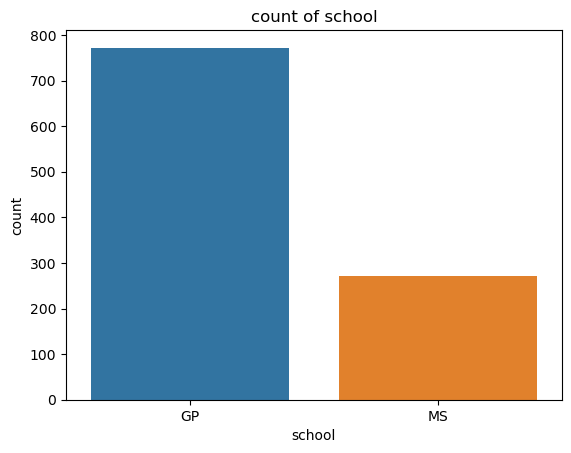

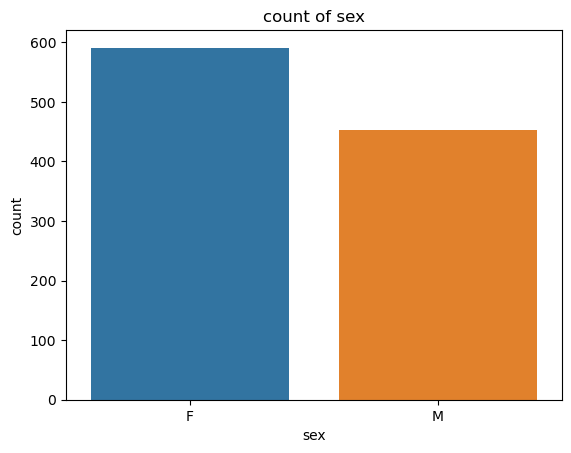

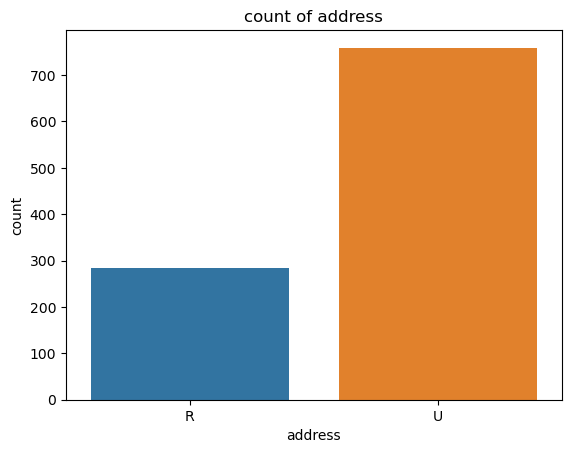

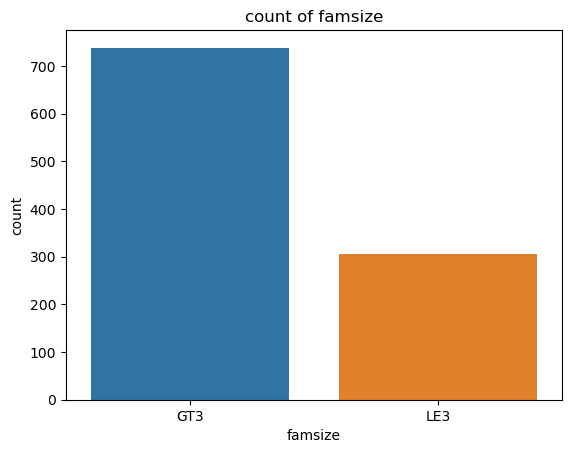

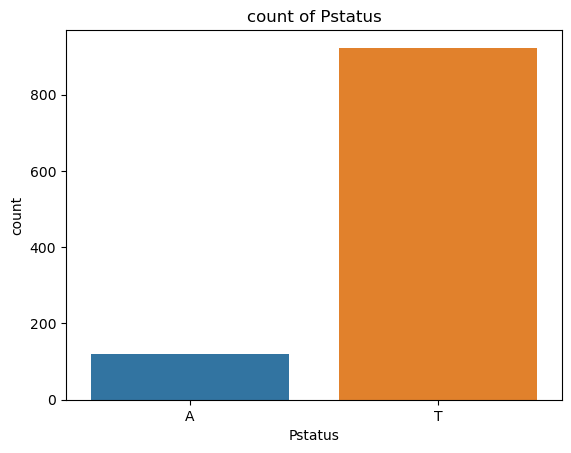

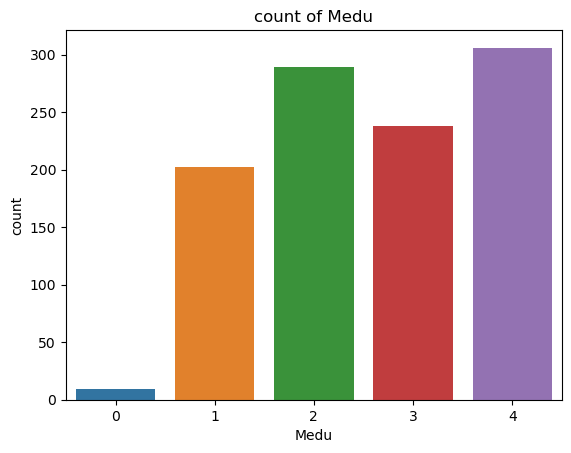

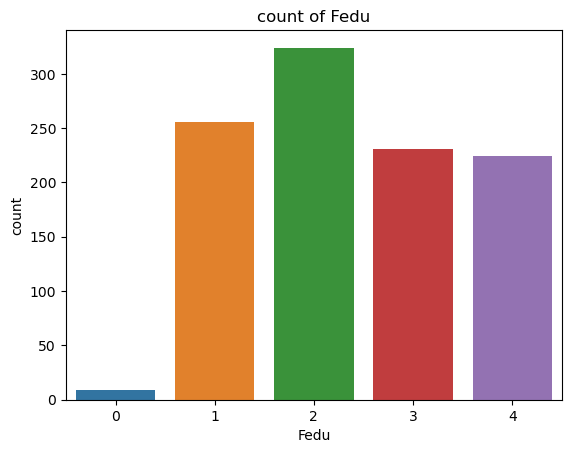

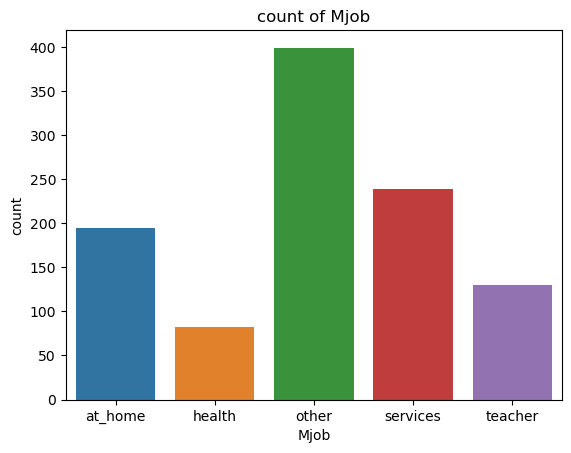

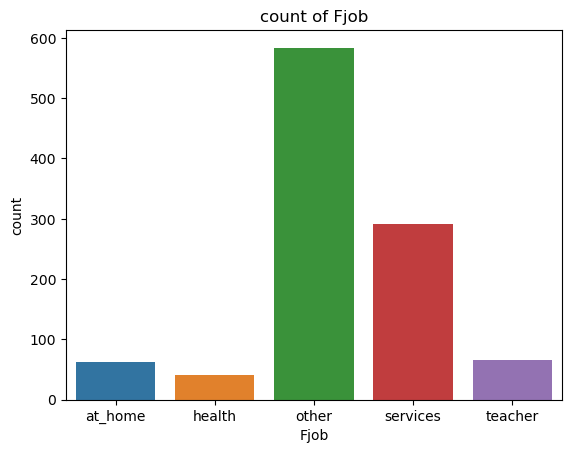

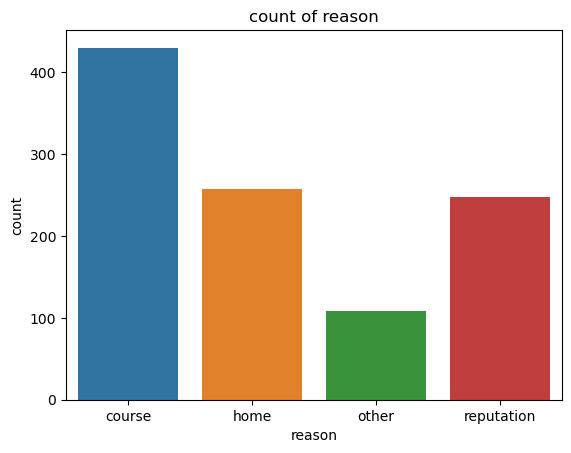

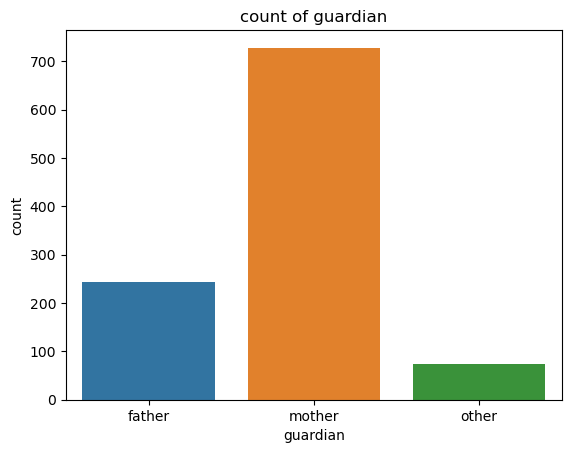

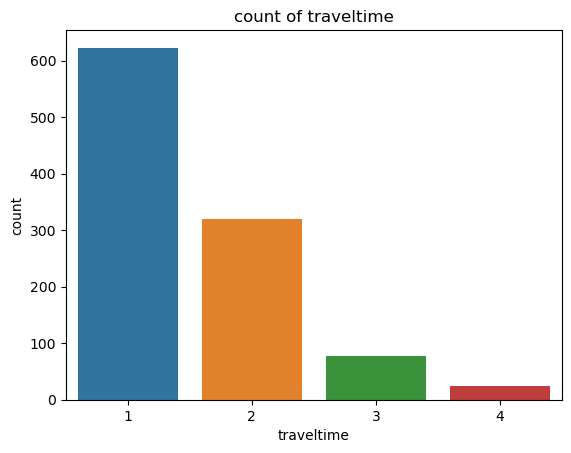

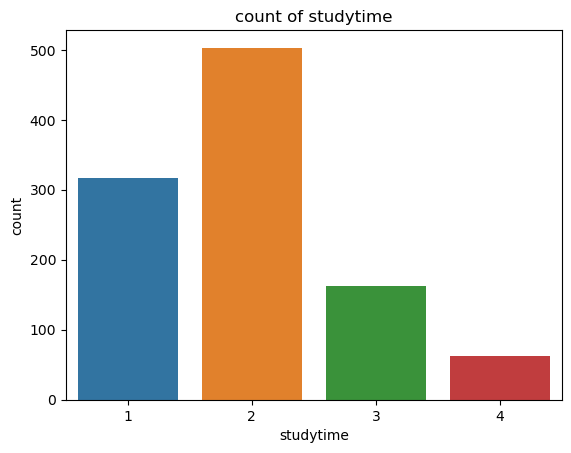

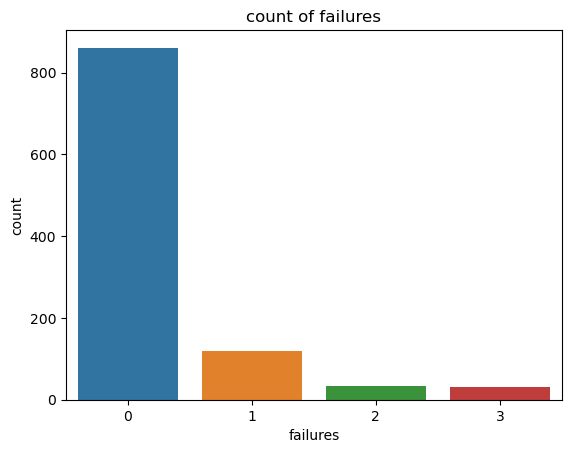

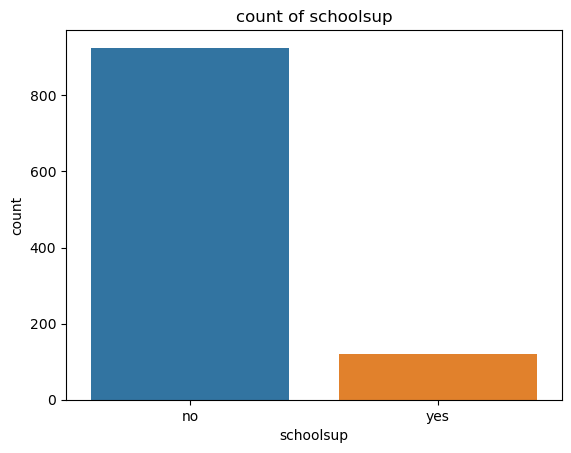

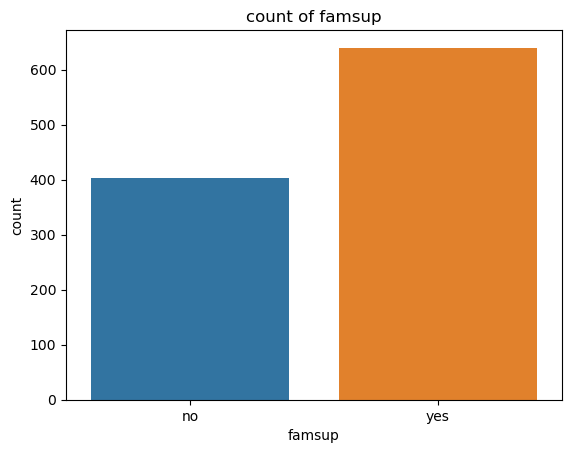

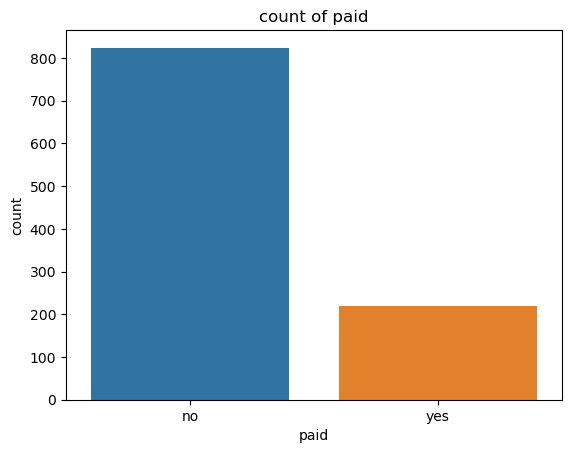

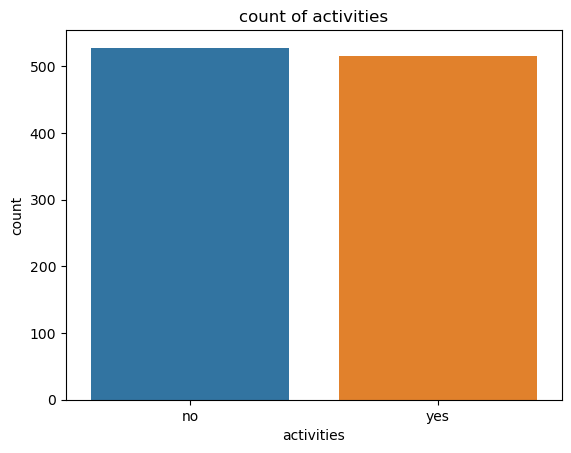

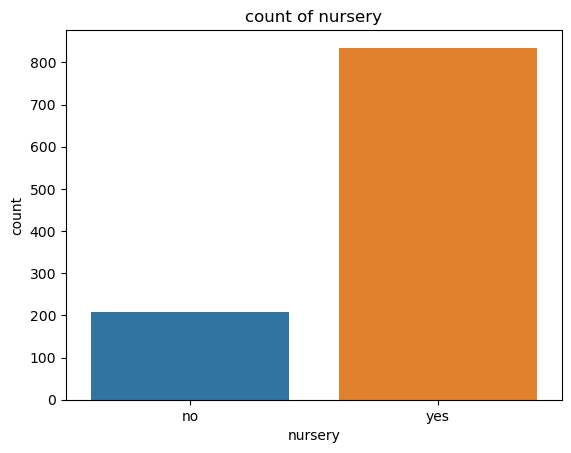

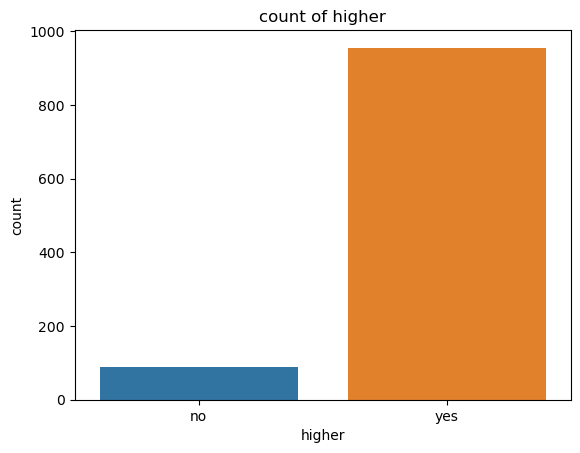

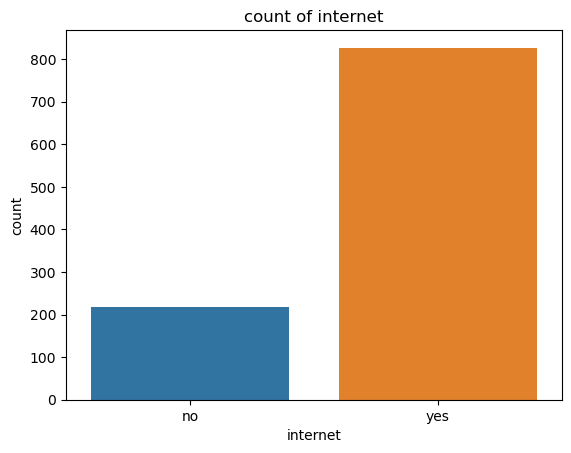

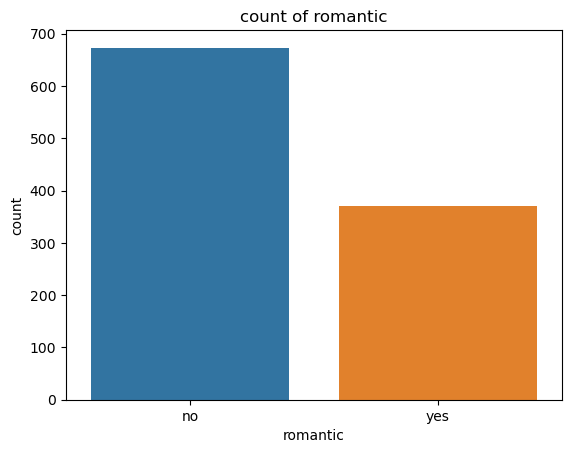

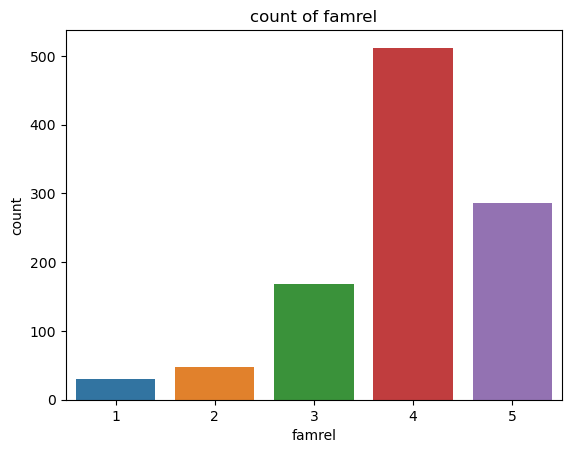

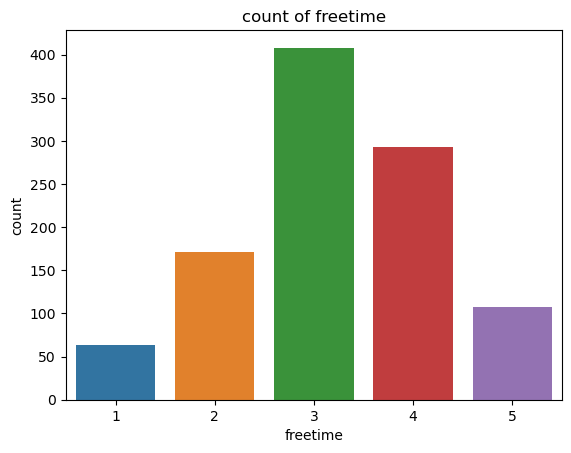

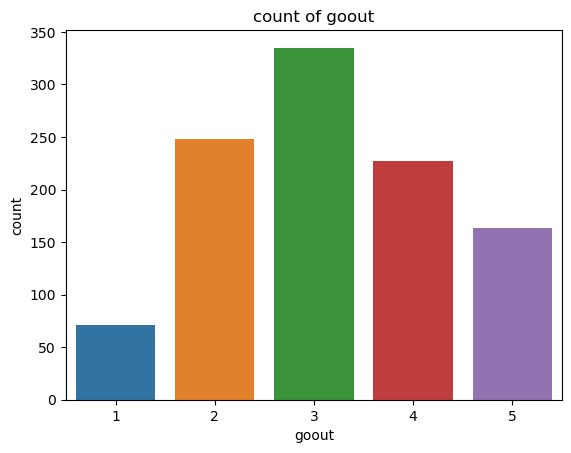

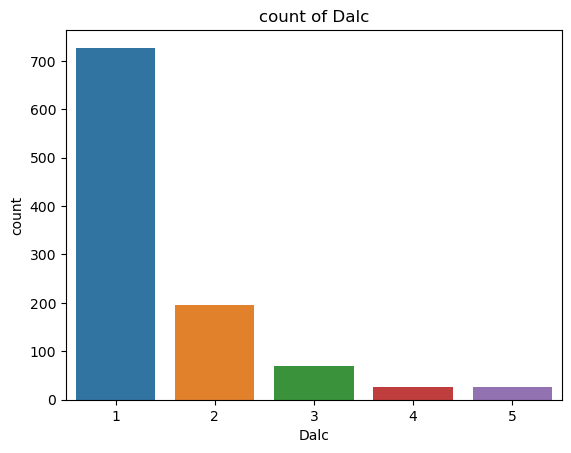

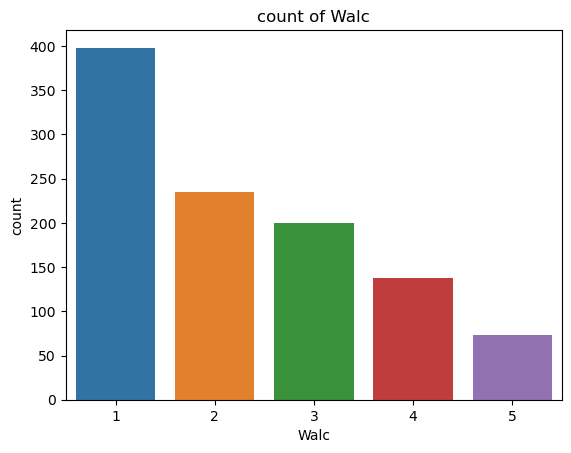

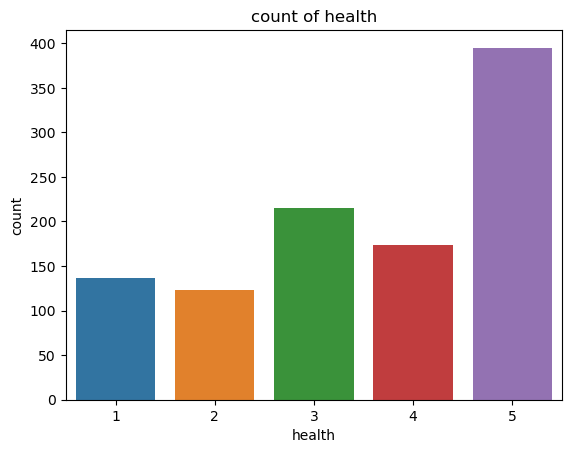

In [72]:
for i in df.select_dtypes(include="category").columns:
    sns.countplot(x=df[i])
    plt.title(f"count of {i}")
    plt.show()

### Summary

1.  For count of school- The total students of por is more than mat students
2.  For count of sex - Female students are more than male students
3.  for count of address- The number of students in urban area is greater than rural area
4.  For famsize - The famsize of GT3 is higher than LE3
5.  For Pstatus - The status of T is more than A
6.  For Medu- The highest level of mother education shows 300% with the lowest of 10% level of education
7.  For Fedu- It shows the status level of father education is above 300% and lowest is above 200%
8.  for count of Mother Job -Over 300% of mothers job are self employed
9.  for count of Father Job- Over 500% of fathers job are self employed
10. for count of reason -
11. for count guardian- 700% of mothers are guardians
12. for count of travel time- Above 600% of students travels
13. for count of study time - 500% of students study time

# Uni-variate analysis for numerical column

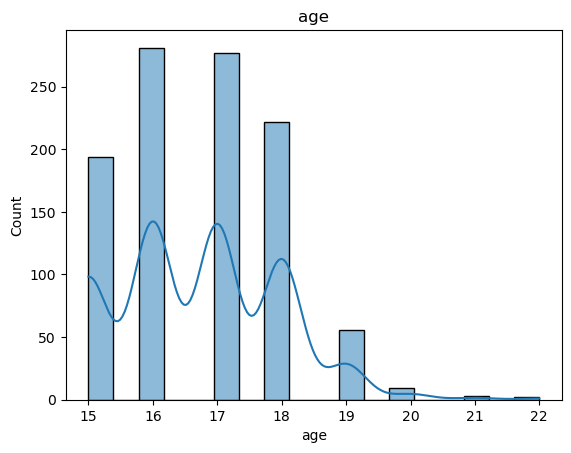

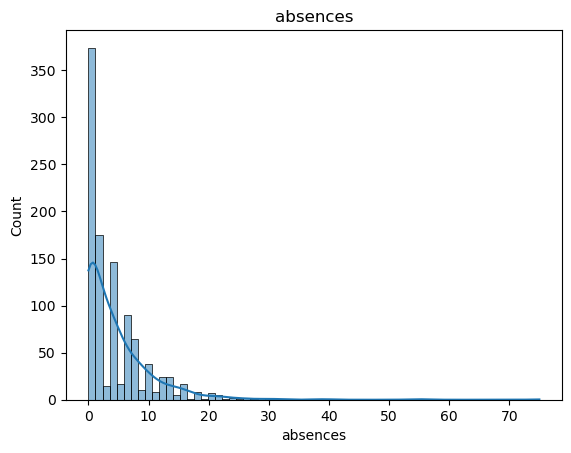

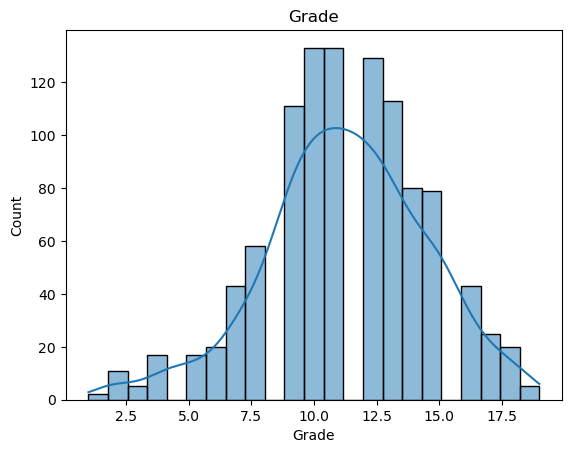

In [73]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(x=df[i],kde=True).set_title(i)
    plt.show()

# Bi-Variate Analysis for category columns vs grade column

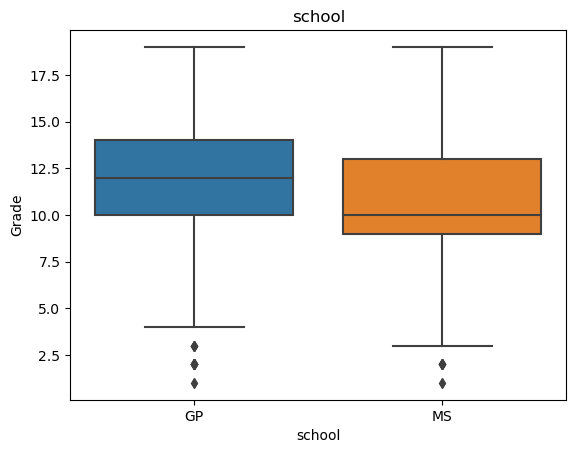

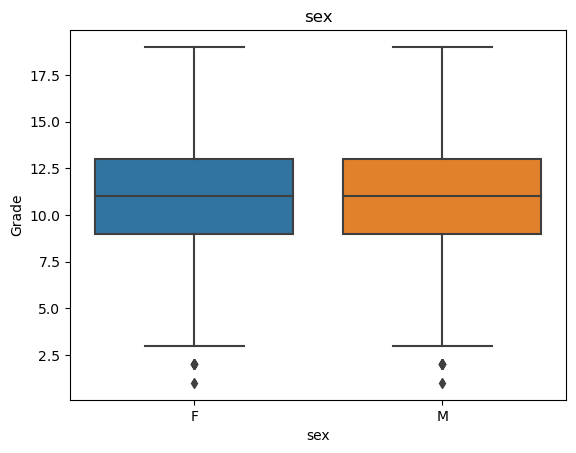

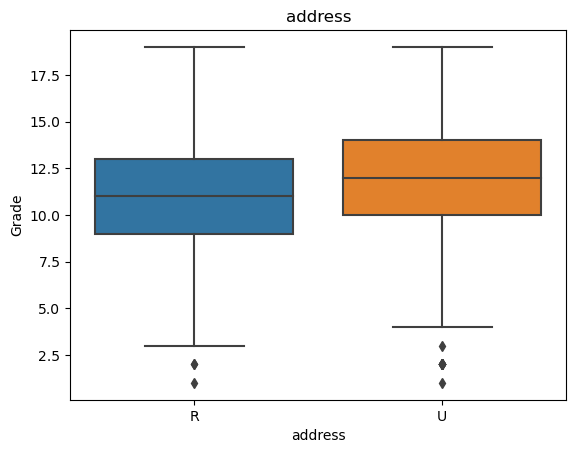

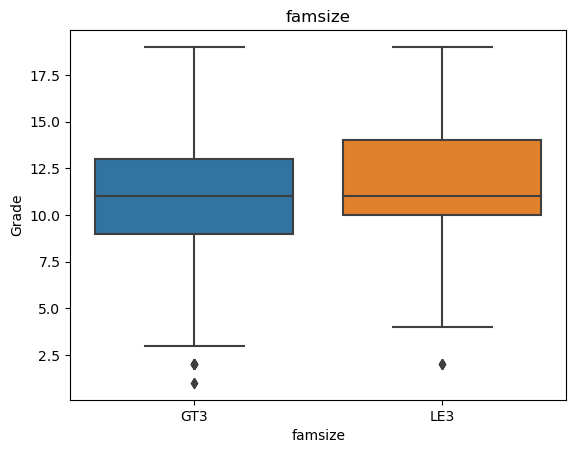

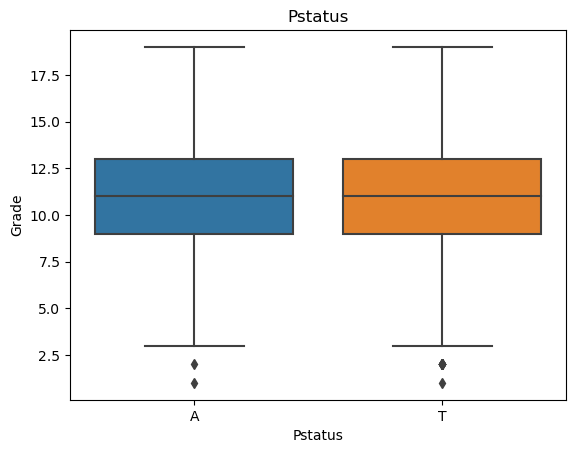

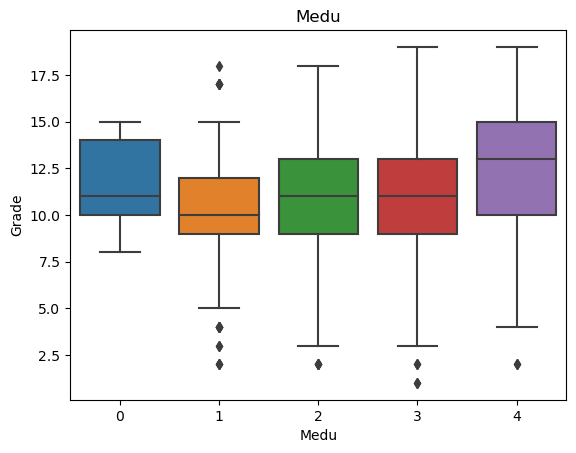

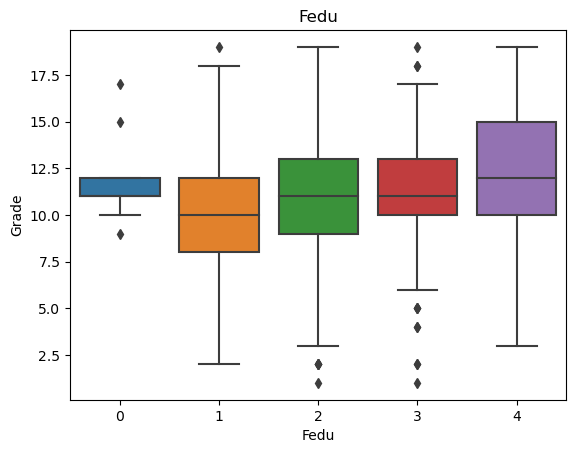

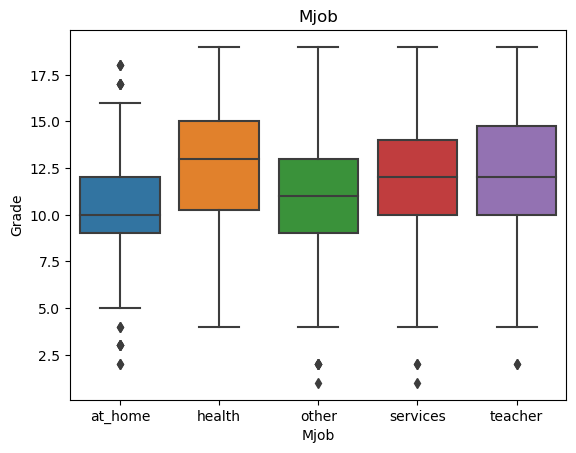

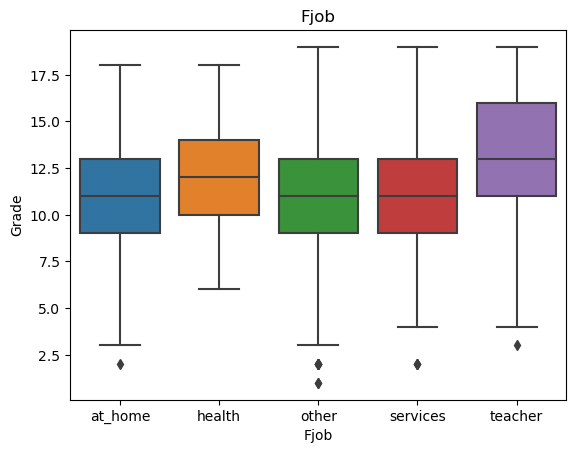

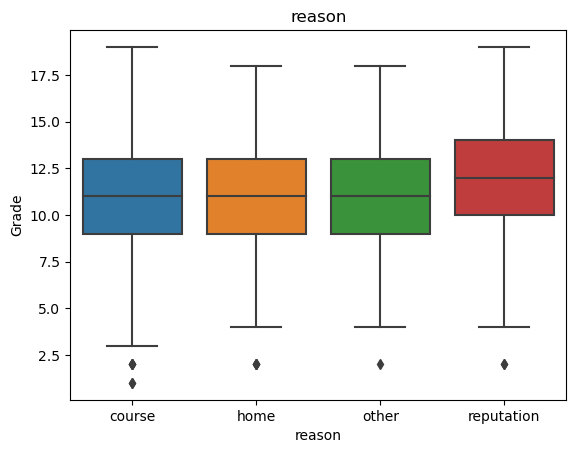

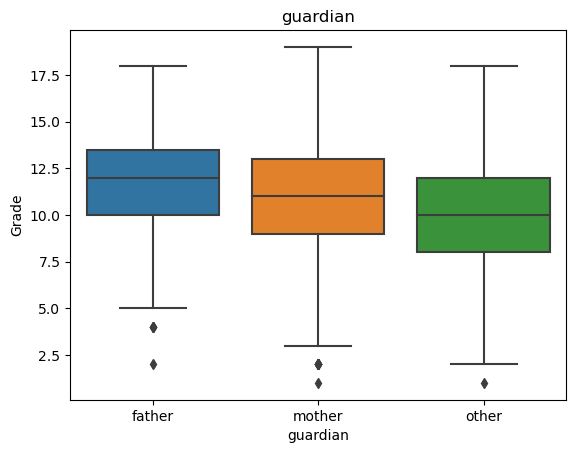

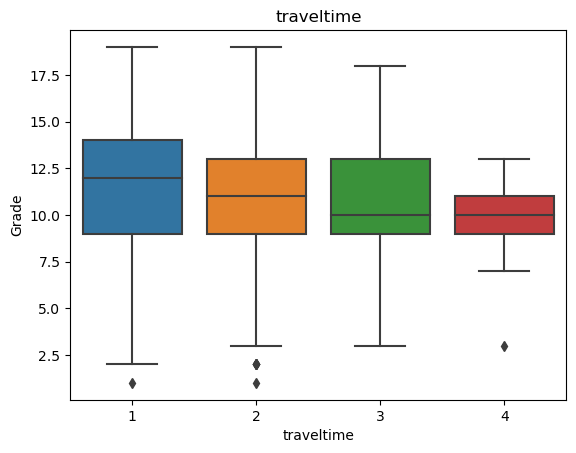

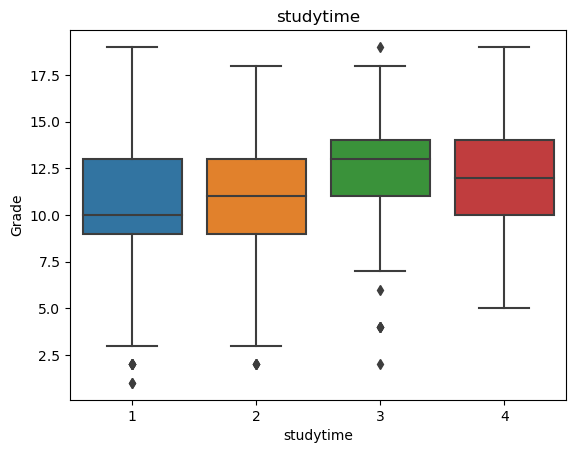

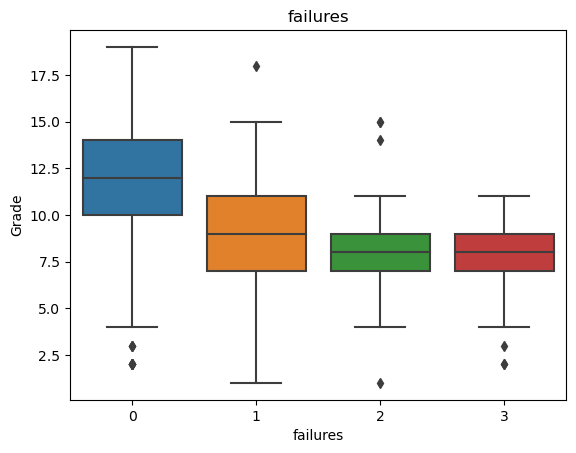

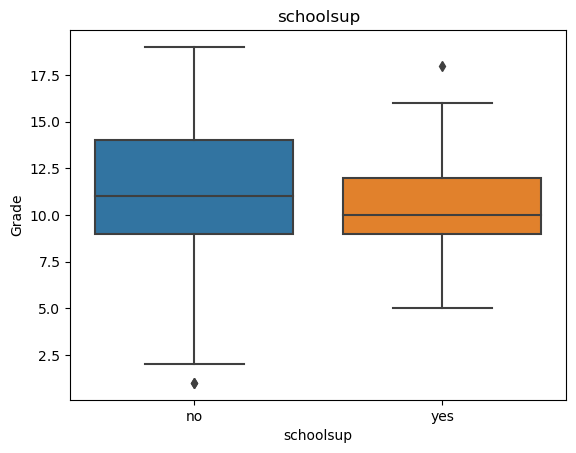

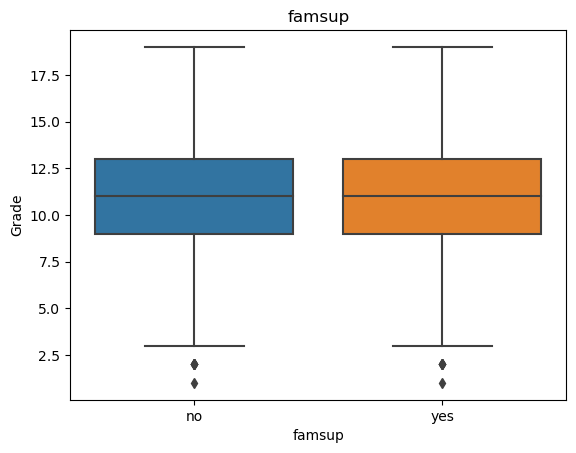

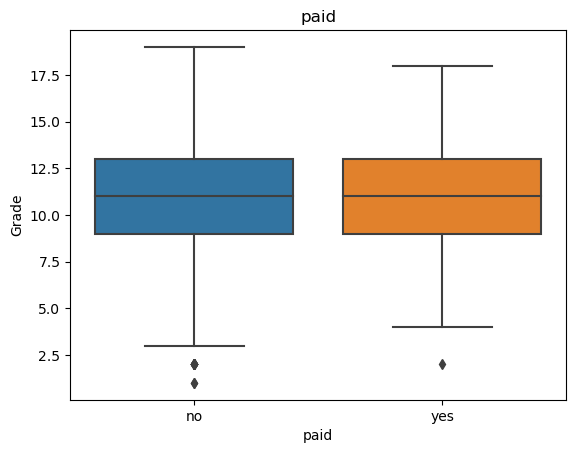

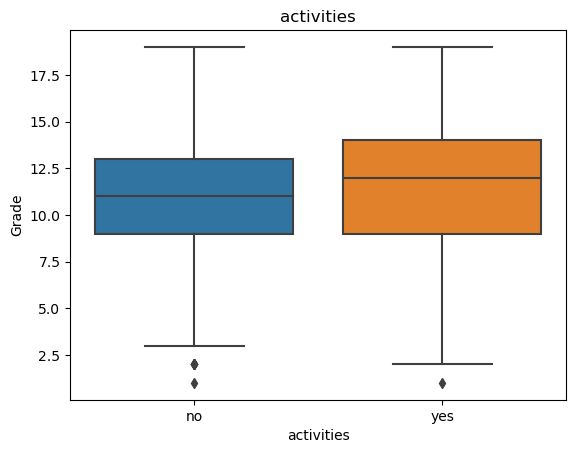

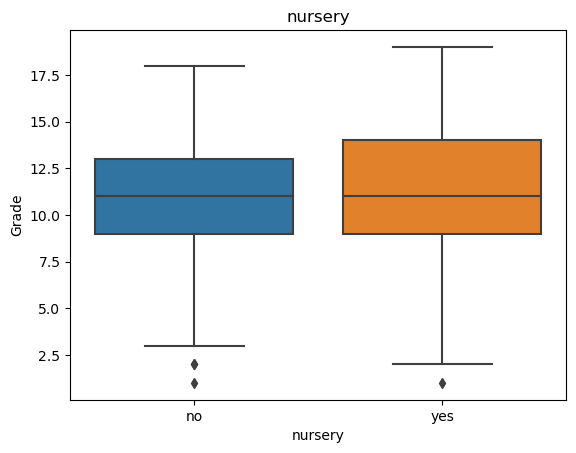

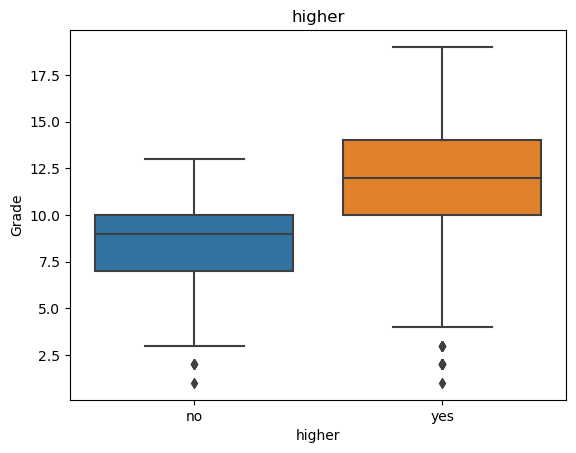

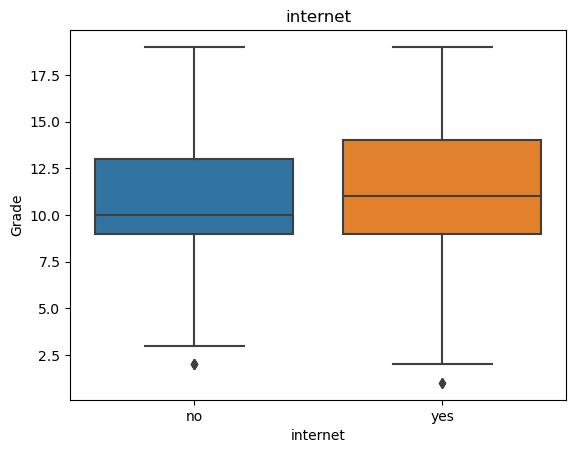

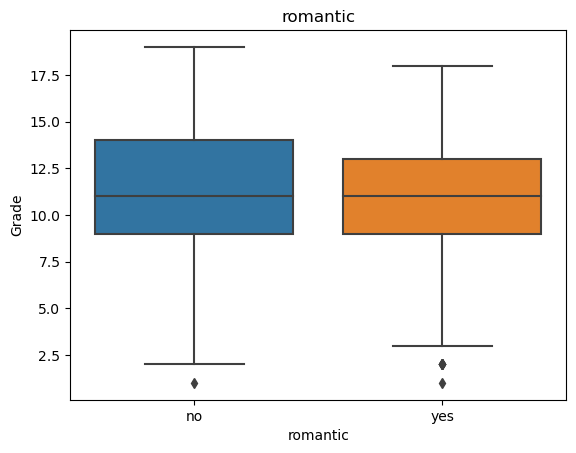

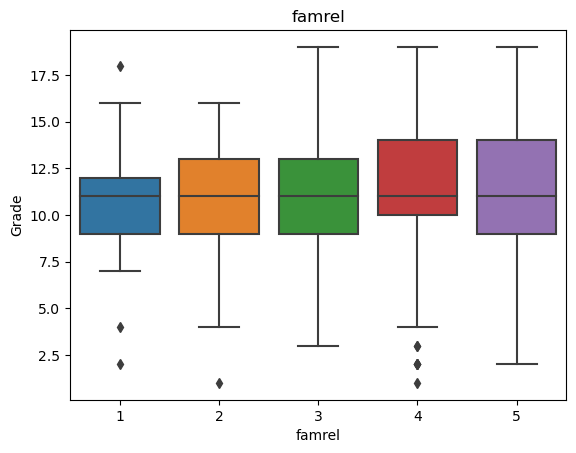

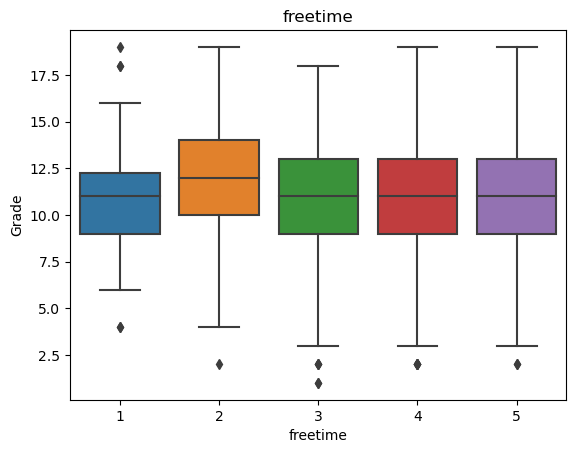

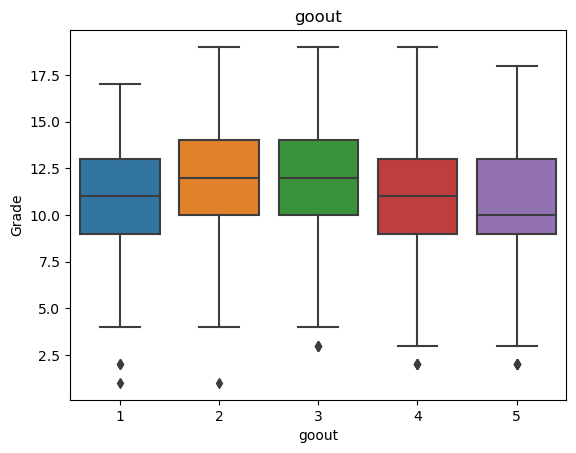

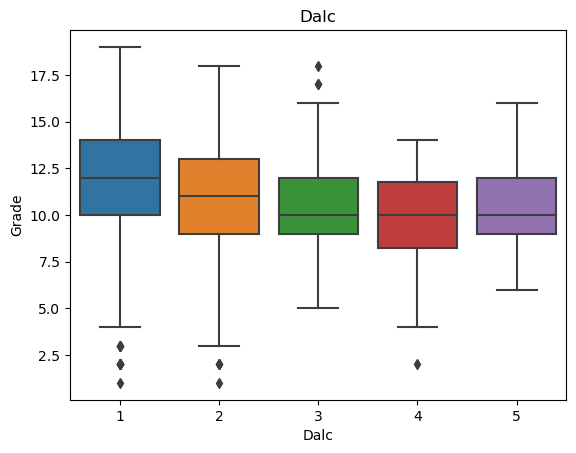

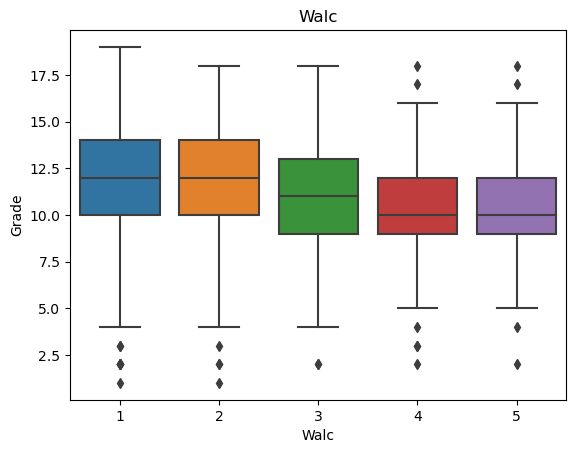

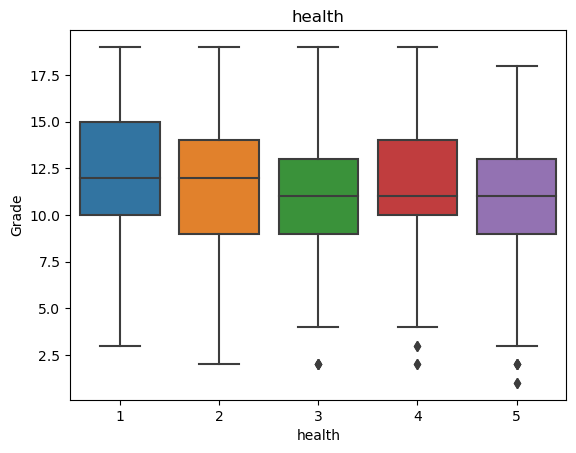

In [74]:
for i in df.select_dtypes(include="category").columns:
    sns.boxplot(data=df,x=i,y="Grade").set_title(i)
    plt.show()

# Multi-variate analysis

<AxesSubplot:xlabel='school', ylabel='age'>

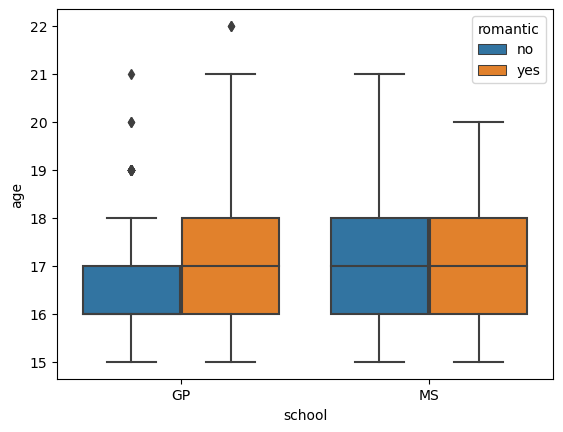

In [75]:
sns.boxplot(data=df,x="school",y="age",hue="romantic")

<AxesSubplot:xlabel='famsize', ylabel='Grade'>

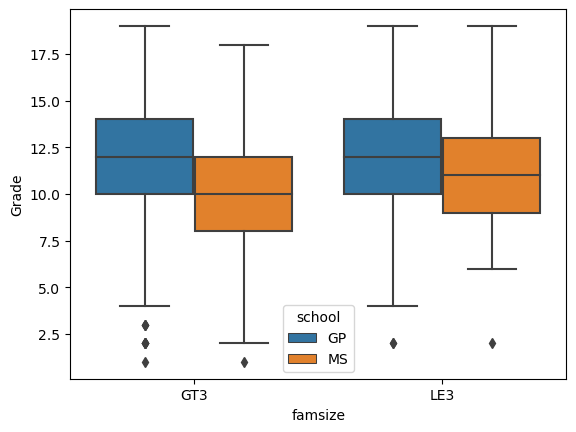

In [76]:
sns.boxplot(data=df,x="famsize",y="Grade",hue="school")

In [81]:
df.to_csv("train.csv",index=False)

In [77]:
df_por=pd.read_csv("student-por.csv", sep=";")

In [78]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [79]:
Data Access

SyntaxError: invalid syntax (3453638493.py, line 1)

# Focusing on the best algorithm and try to make even more better